<a href="https://colab.research.google.com/github/cjuangab/EstadisticayExploraciondeDatosII/blob/main/Evidencia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  **College Dataset**

**Tecnica 1:**

**Correlacion de Pearson**

Dimensiones (filas, columnas): (10000, 10)

Primeras filas:


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
5,CLG0015,96,5.26,5.32,7,No,5,8,0,No
6,CLG0071,123,6.68,6.58,5,No,7,8,2,Yes
7,CLG0096,111,8.77,8.76,7,No,3,1,2,Yes
8,CLG0097,92,6.47,6.33,9,No,7,8,5,No
9,CLG0057,108,8.82,8.60,4,No,5,9,1,No



Información de tipos y nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB
None

Muestra aleatoria:


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
6252,CLG0029,139,7.29,7.24,8,No,8,4,4,No
4684,CLG0070,84,8.28,8.49,8,Yes,3,3,5,No
1731,CLG0008,94,5.26,5.66,8,No,7,10,4,No
4742,CLG0097,100,6.22,6.29,6,Yes,8,6,3,No
4521,CLG0019,116,5.99,6.39,6,No,2,9,5,Yes
6340,CLG0002,86,5.68,5.54,3,No,6,1,1,No
576,CLG0091,103,8.63,8.79,6,Yes,0,8,2,Yes
5202,CLG0014,102,5.22,4.83,8,No,8,4,5,No
6363,CLG0068,110,7.77,7.48,6,No,4,6,1,No
439,CLG0088,99,9.55,9.84,6,No,6,6,4,No



Columna 'College_ID' eliminada.

Columnas antes: ['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Internship_Experience', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Placement']
Columnas después: ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Internship_Experience', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Placement']

Primeras filas de la tabla actualizada:


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No
5,96,5.26,5.32,7,No,5,8,0,No
6,123,6.68,6.58,5,No,7,8,2,Yes
7,111,8.77,8.76,7,No,3,1,2,Yes
8,92,6.47,6.33,9,No,7,8,5,No
9,108,8.82,8.60,4,No,5,9,1,No



Conteo de valores nulos por columna:


,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0



Filas completamente duplicadas (conteo): 0

Variables numéricas: ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']
Variables categóricas: ['Internship_Experience', 'Placement']

Estadísticos de variables numéricas:


,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
IQ,10000.0,99.471800,15.053101,41.00,89.00,99.00,110.00,158.00,226.595864,0.000698,0.027249
Prev_Sem_Result,10000.0,7.535673,1.447519,5.00,6.29,7.56,8.79,10.00,2.095311,-0.034056,-1.193373
CGPA,10000.0,7.532379,1.470141,4.54,6.29,7.55,8.77,10.46,2.161315,-0.032913,-1.109812
Academic_Performance,10000.0,5.546400,2.873477,1.00,3.00,6.00,8.00,10.00,8.256873,-0.016208,-1.225981
Extra_Curricular_Score,10000.0,4.970900,3.160103,0.00,2.00,5.00,8.00,10.00,9.986252,0.010220,-1.220497
Communication_Skills,10000.0,5.561800,2.900866,1.00,3.00,6.00,8.00,10.00,8.415022,-0.014202,-1.243721
Projects_Completed,10000.0,2.513400,1.715959,0.00,1.00,3.00,4.00,5.00,2.944515,-0.013623,-1.277119



Frecuencias para Internship_Experience:


,frecuencia,frecuencia_relativa
Internship_Experience,,
No,6036,0.6036
Yes,3964,0.3964



Frecuencias para Placement:


,frecuencia,frecuencia_relativa
Placement,,
No,8341,0.8341
Yes,1659,0.1659


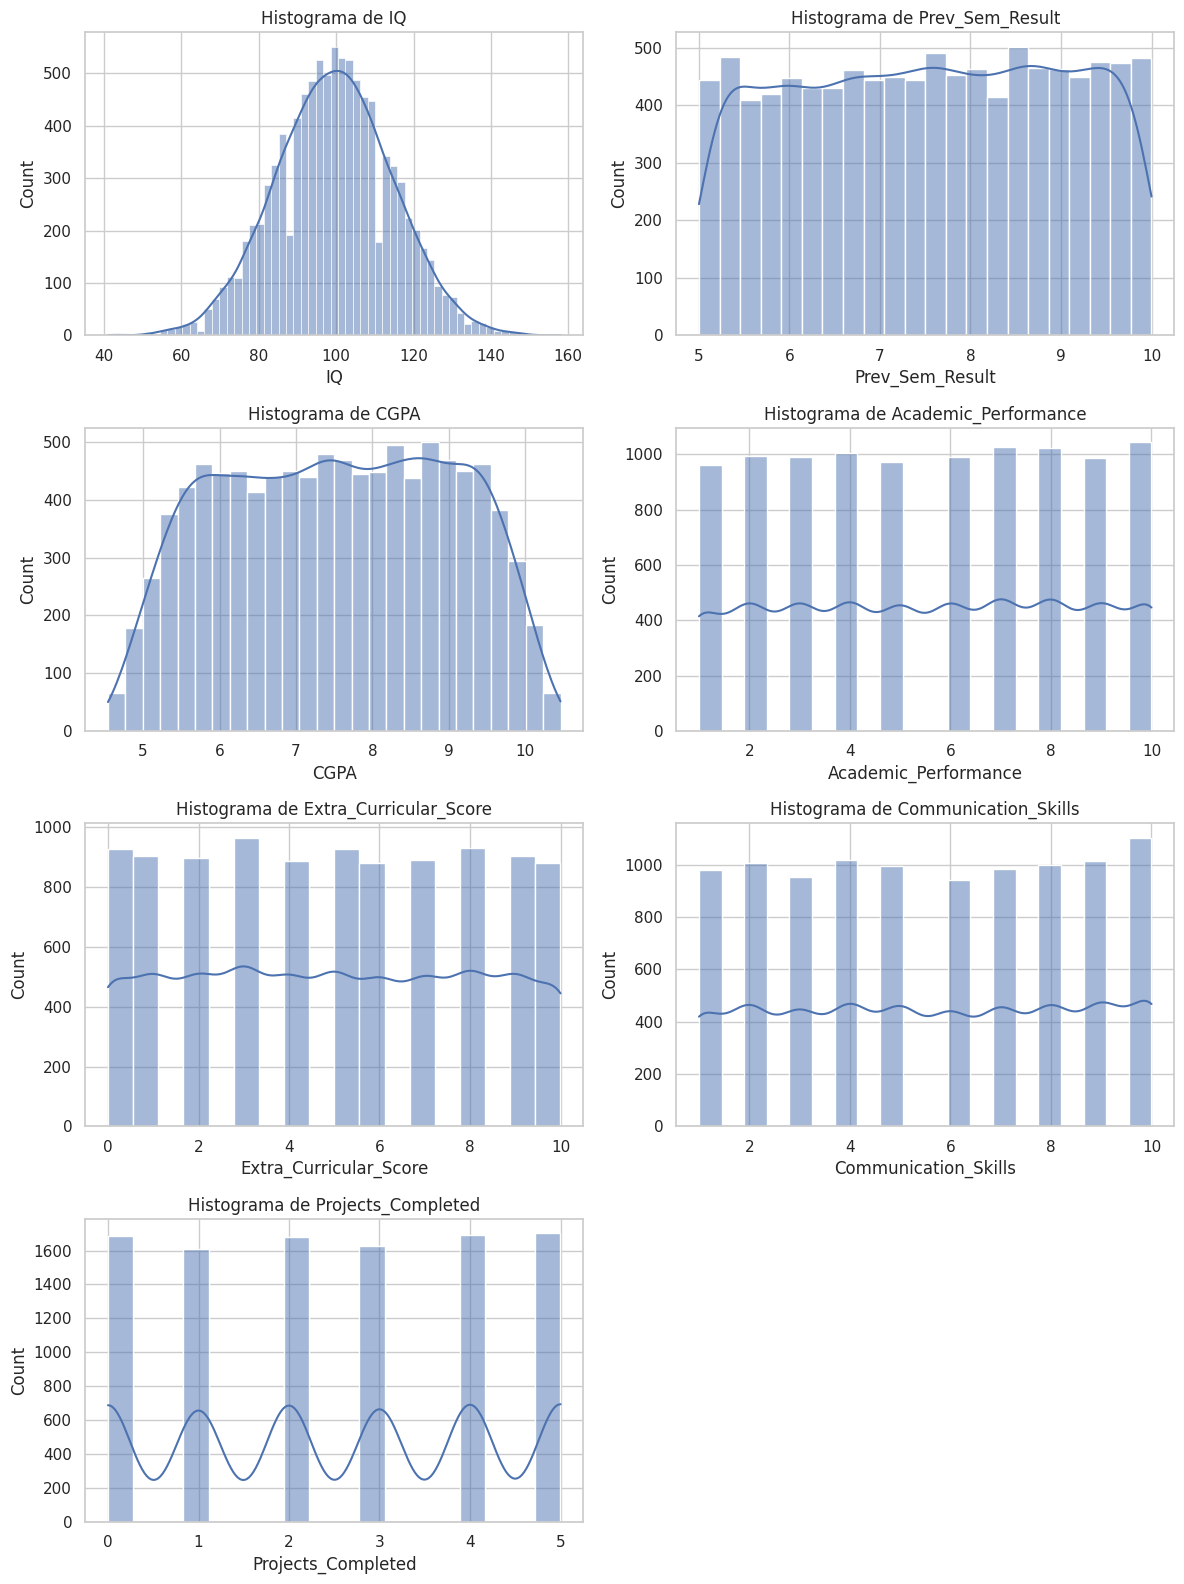

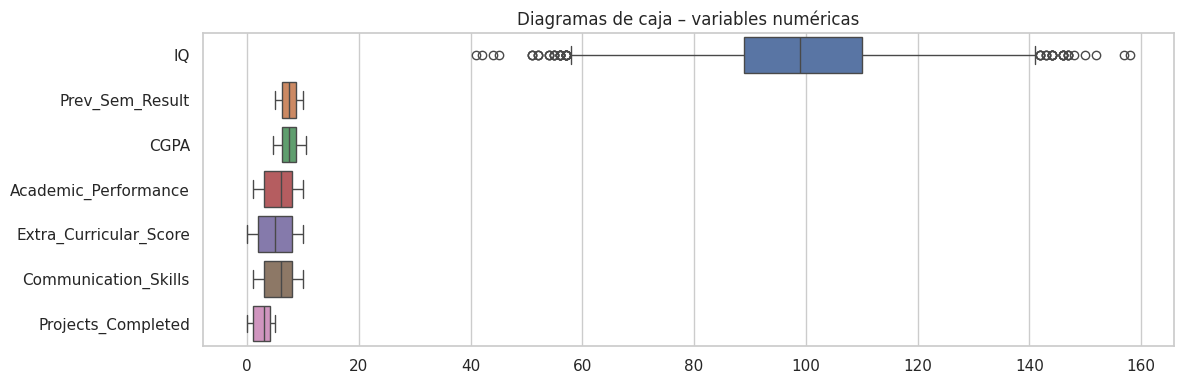

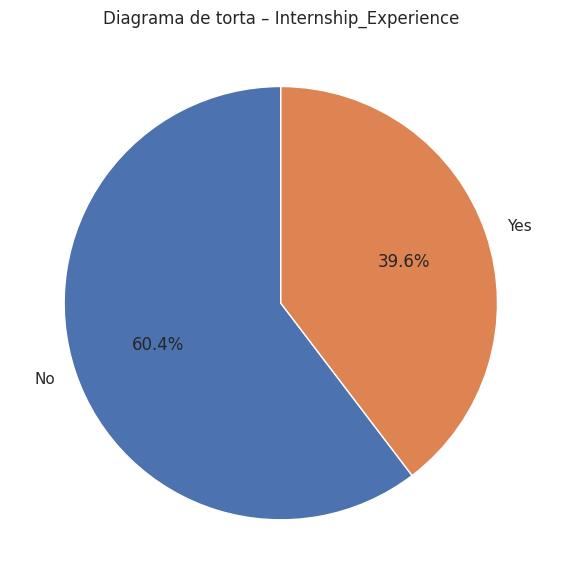

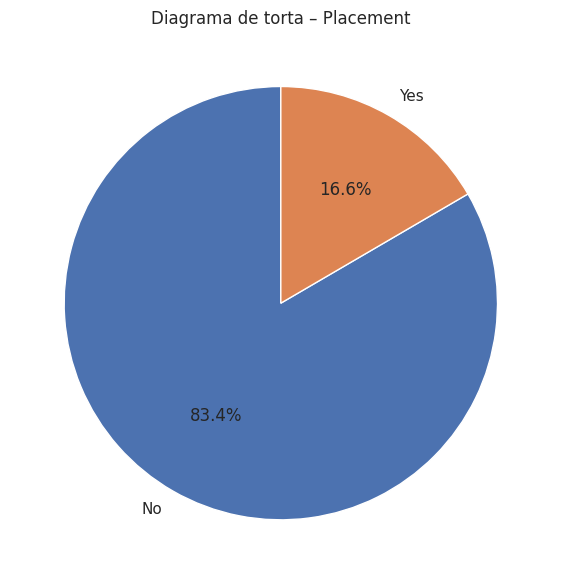


Correlación de Pearson IQ ~ CGPA
r = -0.0029 | p-valor = 0.775
Interpretación: asociación muy débil y no estadísticamente significativa (p ≥ 0.05).


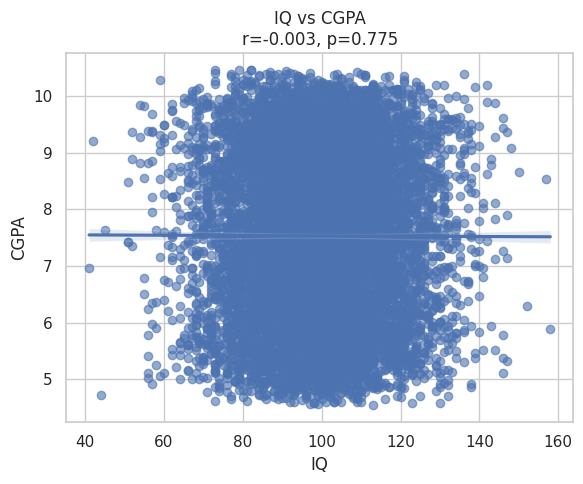


Correlación de Pearson Prev_Sem_Result ~ CGPA
r = 0.9808 | p-valor = 0
Interpretación: asociación muy fuerte y estadísticamente significativa (p < 0.05).


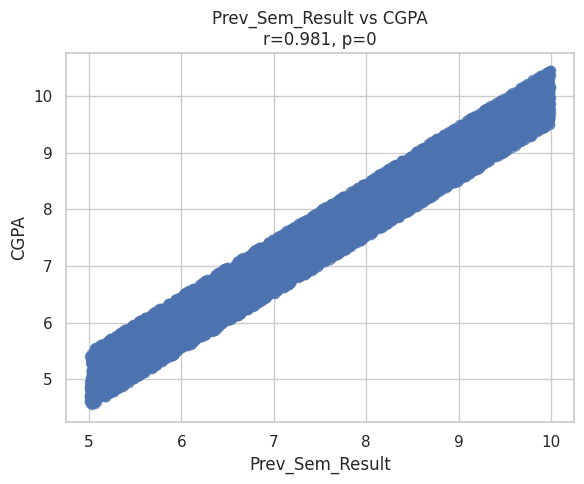

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(style="whitegrid", context="notebook")


url = "https://raw.githubusercontent.com/cjuangab/EstadisticayExploraciondeDatosII/main/Datos/Datos_Estudiantes.csv"
df = pd.read_csv(url)

#Vista rápida del DataSet

print("Dimensiones (filas, columnas):", df.shape)
print("\nPrimeras filas:")
display(df.head(10))

print("\nInformación de tipos y nulos:")
print(df.info())

print("\nMuestra aleatoria:")
display(df.sample(min(10, len(df)), random_state=42))

# Dado que los ID de los alumnos no aportan ninguna informacion significativa para el analisis
# y que pueden presentar alguna vulnerabilidad de privacidad, decidimos eliminar dicha columna

cols_before = df.columns.tolist()
if "College_ID" in df.columns:
    df = df.drop(columns=["College_ID"])
    print("\nColumna 'College_ID' eliminada.")
else:
    print("\nAviso: no se encontró la columna 'College_ID'; no se eliminó nada.")

print("\nColumnas antes:", cols_before)
print("Columnas después:", df.columns.tolist())

#Vista breve de la nueva tabla

print("\nPrimeras filas de la tabla actualizada:")
display(df.head(10))


# Chequeo de nulos y duplicados (útil para justificar limpieza)

print("\nConteo de valores nulos por columna:")
display(df.isna().sum())

print("\nFilas completamente duplicadas (conteo):", df.duplicated().sum())


# Estadísticos básicos por tipo de variable

# Detectar variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("\nVariables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

# a) Estadísticos numéricos (describe + varianza + asimetría + curtosis)
desc = df[num_cols].describe(percentiles=[0.25, 0.5, 0.75]).T if num_cols else pd.DataFrame()
if not desc.empty:
    desc["variance"] = df[num_cols].var()
    desc["skewness"] = df[num_cols].skew()
    desc["kurtosis"] = df[num_cols].kurtosis()
    print("\nEstadísticos de variables numéricas:")
    display(desc)

# b) Estadísticos para cualitativas: frecuencias y frecuencias relativas
cat_summary = {}
for c in cat_cols:
    vc = df[c].value_counts(dropna=False)
    rel = df[c].value_counts(normalize=True, dropna=False).round(4)
    cat_summary[c] = pd.DataFrame({"frecuencia": vc, "frecuencia_relativa": rel})
    print(f"\nFrecuencias para {c}:")
    display(cat_summary[c])


# Gráficos exploratorios



# Histogramas para todas las numéricas
if num_cols:
    n = len(num_cols)
    ncols = 2
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4*nrows))
    axes = axes.flatten() if n > 1 else [axes]
    for i, col in enumerate(num_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f"Histograma de {col}")
# Ocultar subplots vacíos si los hay
    for j in range(i+1, len(axes)):
        axes[j].axis("off")
    plt.tight_layout()
    plt.show()

#Diagramas de caja (boxplots) de numéricas
if num_cols:
    plt.figure(figsize=(12, max(4, 0.5*len(num_cols))))
    sns.boxplot(data=df[num_cols], orient="h")
    plt.title("Diagramas de caja – variables numéricas")
    plt.tight_layout()
    plt.show()

# Diagramas de torta para categóricas “manejables” (<=10 categorías)
for c in cat_cols:
    counts = df[c].value_counts(dropna=False)
    if counts.shape[0] <= 10:
        plt.figure(figsize=(6, 6))
        counts.plot.pie(autopct="%1.1f%%", startangle=90)
        plt.ylabel("")
        plt.title(f"Diagrama de torta – {c}")
        plt.tight_layout()
        plt.show()
    else:
        # Si hay muchas categorías, mejor un barplot
        plt.figure(figsize=(10, 4))
        sns.countplot(y=c, data=df, order=counts.index)
        plt.title(f"Frecuencias – {c}")
        plt.tight_layout()
        plt.show()

# Realizamos un estudio de Pearson para evaluar futuras regresiones posibles

#Correlaciones de Pearson solicitadas

def correlacion_pearson(x, y, nombre_x, nombre_y, data):
    # Filtrar filas con ambos datos no nulos
    sub = data[[x, y]].dropna()
    if sub.empty:
        print(f"No hay datos suficientes para {nombre_x} vs {nombre_y}.")
        return None, None
    r, p = pearsonr(sub[x], sub[y])
    print(f"\nCorrelación de Pearson {nombre_x} ~ {nombre_y}")
    print(f"r = {r:.4f} | p-valor = {p:.4g}")
    # Interpretación breve
    magnitud = (
        "muy débil" if abs(r) < 0.2 else
        "débil"     if abs(r) < 0.4 else
        "moderada"  if abs(r) < 0.6 else
        "fuerte"    if abs(r) < 0.8 else
        "muy fuerte"
    )
    signif = "estadísticamente significativa (p < 0.05)" if p < 0.05 else "no estadísticamente significativa (p ≥ 0.05)"
    print(f"Interpretación: asociación {magnitud} y {signif}.")
# Gráfico de dispersión con recta de regresión
    plt.figure(figsize=(6, 5))
    sns.regplot(x=x, y=y, data=sub, ci=95, scatter_kws={"alpha": 0.6})
    plt.title(f"{nombre_x} vs {nombre_y}\nr={r:.3f}, p={p:.3g}")
    plt.tight_layout()
    plt.show()
    return r, p

# A) IQ vs CGPA (hipótesis: sin correlación)
if set(["IQ", "CGPA"]).issubset(df.columns):
    r1, p1 = correlacion_pearson("IQ", "CGPA", "IQ", "CGPA", df)
else:
    print("\nNo se encontraron ambas columnas 'IQ' y 'CGPA' para el análisis.")

# B) Prev_Sem_Result vs CGPA (hipótesis: sí hay correlación)
# Nota: si Prev_Sem_Result es categórica ordinal codificada como texto, hay que convertirla a numérica/ordinal.
if "Prev_Sem_Result" in df.columns and "CGPA" in df.columns:
    temp = df.copy()
    if temp["Prev_Sem_Result"].dtype == "O":
# Mapeo común (editar si tu dataset usa otros niveles)
        orden = {
            "Very Low": 1, "Low": 2, "Below Average": 3, "Average": 4,
            "Above Average": 5, "High": 6, "Very High": 7
        }
        temp["Prev_Sem_Result_num"] = temp["Prev_Sem_Result"].map(orden)
        if temp["Prev_Sem_Result_num"].isna().all():
# Si el mapeo falló, intentar convertir directo a categoría ordenada por frecuencia
            cats = temp["Prev_Sem_Result"].value_counts().index.tolist()
            cat_to_num = {c: i+1 for i, c in enumerate(cats)}
            temp["Prev_Sem_Result_num"] = temp["Prev_Sem_Result"].map(cat_to_num)

        print("\nPrev_Sem_Result mapeado a numérico para Pearson (ver 'Prev_Sem_Result_num').")
        r2, p2 = correlacion_pearson("Prev_Sem_Result_num", "CGPA", "Prev_Sem_Result (num)", "CGPA", temp)
    else:
        r2, p2 = correlacion_pearson("Prev_Sem_Result", "CGPA", "Prev_Sem_Result", "CGPA", temp)
else:
    print("\nNo se encontraron ambas columnas 'Prev_Sem_Result' y 'CGPA' para el análisis.")


Dado los resultados de Pearson deducimos que existe una correlacion entre los Promedos de los alumnos CGPA y los promedios de años anteriores, y no asi entre el IQ de los alumnos y su promedio CGPA

**Tecnica 2: Regresión Lineal Simple**

=== Promedio ponderado de carrera ~ Resultados semestre pasado (HC3) ===
                                  OLS Regression Results                                 
Dep. Variable:     Promedio ponderado de carrera   R-squared:                       0.962
Model:                                       OLS   Adj. R-squared:                  0.962
Method:                            Least Squares   F-statistic:                 2.536e+05
Date:                           Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                                   13:47:22   Log-Likelihood:                -1704.0
No. Observations:                          10000   AIC:                             3412.
Df Residuals:                               9998   BIC:                             3426.
Df Model:                                      1                                         
Covariance Type:                             HC3                                         
                           

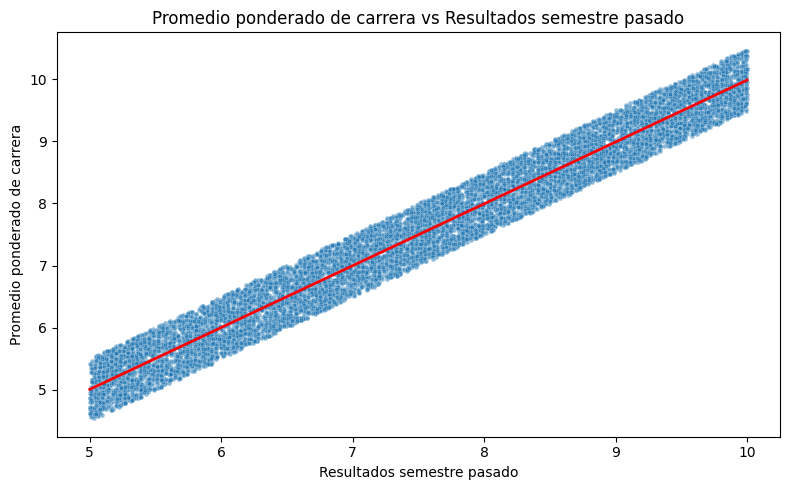

Ese R² tan alto es esperable si la X son resultados del semestre pasado, porque el promedio ponderado es 
acumulado y por construcción contiene el desempeño previo por lo que hay acoplamiento matemático.
Esto nos sirve mucho para predecir, pero no prueba causalidad.

Para poder probar causalidad no nos sirve una regresion simple, ya que el factor que prueba causalidad es la aleatorización
Con un corte transversal simple y una regresión, se obtiene asociación, no causalidad.


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#carga data set
df = pd.read_csv('/content/Datos_Estudiantes.csv')

#renombro columnas para que sea mas legible
df = df.rename(columns={'CGPA': 'Promedio ponderado de carrera', 'Prev_Sem_Result': 'Resultados semestre pasado'})

def reg_simple(df, ycol, xcol):
    #limpio los datos sacando los #n/a y trabajo sobre la copia del df
    sub = df[[ycol, xcol]].dropna().copy()
    y = sub[ycol]
    x = sub[xcol]
    #agrego la variable independiente al modelo
    X = sm.add_constant(x)
    #realizo el entrenamiento
    m = sm.OLS(y, X).fit(cov_type='HC3')
    print(f"=== {ycol} ~ {xcol} (HC3) ===")
    print(m.summary())
    r = np.corrcoef(x, y)[0,1]
    print(f"Pearson r = {r:.3f}  |  R^2 = {r**2:.3f}")

    order = np.argsort(x.values)
    #defino el tamaño de la figura
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=x, y=y, s=12, alpha=0.5)
    plt.plot(x.values[order], m.fittedvalues.values[order], lw=2, color='red')
    plt.xlabel(xcol); plt.ylabel(ycol)
    plt.title(f'{ycol} vs {xcol}')
    plt.tight_layout(); plt.show()
    return m


m_prev = reg_simple(df, 'Promedio ponderado de carrera', 'Resultados semestre pasado')


print('Ese R² tan alto es esperable si la X son resultados del semestre pasado, porque el promedio ponderado es \n'
'acumulado y por construcción contiene el desempeño previo por lo que hay acoplamiento matemático.\n'
'Esto nos sirve mucho para predecir, pero no prueba causalidad.\n')

print('Para poder probar causalidad no nos sirve una regresion simple, ya que el factor que prueba causalidad es la aleatorización\n'
 'Con un corte transversal simple y una regresión, se obtiene asociación, no causalidad.')


# <font color="#4FC3F7">Interpretación de resultados: Regresión Lineal Simple</font>  

En este análisis se evaluó la relación entre:  

- **Variable dependiente (Y):** Promedio ponderado de carrera  
- **Variable independiente (X):** Resultados del semestre pasado  

El objetivo principal fue determinar en qué medida el desempeño del último semestre explica el promedio acumulado de la carrera y si la relación es estadísticamente significativa.  

---

## <font color="#81C784">Resumen del modelo</font>  

| Métrica | Valor |
|---------|-------|
| Coeficiente de correlación (r) | 0.981 |
| Coeficiente de determinación (R²) | 0.962 |
| Ecuación del modelo | Promedio ponderado = 0.0261 + 0.9961 × Resultados semestre pasado |
| Significancia (p-valor) | < 0.001 |

---

## <font color="#FFB74D">Desarrollo de la interpretación</font>  

**→ Relación entre variables**  
El coeficiente de correlación de Pearson (r = 0.981) refleja una **asociación positiva muy fuerte**.  
Esto indica que un buen desempeño en el semestre pasado suele estar acompañado de un promedio acumulado elevado.  

**→ Explicación de la variabilidad**  
El coeficiente de determinación (R² = 0.962) indica que el **96.2% de la variación** en el promedio de carrera se explica por los resultados del semestre pasado.  
Aunque este valor es alto, es un resultado **esperable**, ya que ambas variables están estructuralmente vinculadas: el promedio acumulado integra directamente el rendimiento de cada semestre.  

**→ Interpretación de los coeficientes**  
- Intercepto (β₀ = 0.0261): valor estimado del promedio acumulado cuando los resultados del semestre pasado son 0. Carece de relevancia práctica en este contexto.  
- Pendiente (β₁ = 0.9961): por cada punto adicional en el semestre pasado, el promedio de carrera aumenta casi en **un punto**. La relación lineal es prácticamente perfecta.  

**→ Significancia estadística**  
El p-valor < 0.001 confirma que la relación entre ambas variables es **estadísticamente significativa**, por lo que la probabilidad de que el resultado se deba al azar es prácticamente nula.  

---

## <font color="#FFD54F">Consideraciones metodológicas</font>  

— El elevado R² no debe interpretarse como causalidad.  
— Lo que se observa es una **asociación esperada** derivada de cómo se construyen ambas variables.  


---

## <font color="#64B5F6">Conclusiones</font>  

1. Existe una **asociación lineal fuerte, positiva y significativa** entre los resultados del semestre pasado y el promedio acumulado de carrera.  
2. El modelo permite realizar **predicciones precisas** del promedio de carrera a partir del rendimiento en semestres recientes.  
3. Sin embargo, el **alto ajuste se debe en gran medida a dependencia matemática**, por lo que no constituye evidencia de causalidad.  
4. Este análisis es ilustrativo para mostrar cómo la regresión lineal simple captura asociaciones.  
